In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.quantum_info import SparsePauliOp
algorithm_globals.random_seed = 42

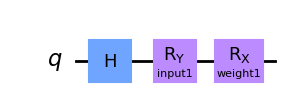

In [2]:
# construct parametrized circuit
params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl")

In [6]:
observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])
qnn1 = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]])

# define (random) input and weights
input1 = algorithm_globals.random.random(qnn1.num_inputs)
weights1 = algorithm_globals.random.random(qnn1.num_weights)

In [8]:
# QNN forward pass
qnn1.forward(input1, weights1)
# QNN batched forward pass
qnn1.forward([input1, input1], weights1)


array([[0.2970094],
       [0.2970094]])

In [10]:
# QNN backward pass
qnn1.backward(input1, weights1)
# QNN batched backward pass
qnn1.backward([input1, input1], weights1)

(None,
 array([[[0.63272767]],
 
        [[0.63272767]]]))

In [12]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)
# QNN forward pass
qnn2.forward(input1, weights1)

array([[ 0.2970094 , -0.63272767]])